In [35]:
!pip install seaborn

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import keras

In [37]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.sparse import csr_matrix  # For sparse matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In these lines, the dataset downloads the complete CICIDS-2017 dataset.
In the previous model, I used only one day part

In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
low_memory=False
df1=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")

* Here we combine dataset parts into one dataframe
* Because processing is easy
* Next, we print the important data of the dataset

In [39]:
nRowsRead = None 
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max          

(2830743, 79)

Here, the summary statistics table of the DataFrame is created

In [40]:
df.describe(include="all")

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.829385e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2.830743e+06,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BENIGN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2273097
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,inf,inf,1.298449e+06,2.919271e+06,9.182475e+06,1.623796e+05,1.448296e+07,2.610193e+06,3.266957e+06,9.042939e+06,1.021893e+06,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,0.0,1.112782e-04,0.0,-2.599739e+04,-2.273275e+03,6.386535e+04,6.995192e+03,1.643450e+01,9.504024e+02,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,-2.599739e+04,0.0,0.0,0.0,0.0

* In this code, the Label column of the data lists BENIGN and various attack types.
* We fill this column with 0 for BENIGN and 1 for attack.

In [41]:
df[' Label'] = df[' Label'].map(lambda a: 0 if a == 'BENIGN' else 1)

In [42]:
df = df.drop([' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'], axis=1)

In [43]:
df.duplicated().sum()

308381

keeps the first repeated rows and deletes the rest

In [44]:
df =  df.drop_duplicates(keep="first")

In [45]:
df.isnull().sum().sort_values(ascending = False)

Flow Bytes/s                    353
 Destination Port                 0
 Fwd Header Length.1              0
 Avg Fwd Segment Size             0
 Average Packet Size              0
 Down/Up Ratio                    0
 ECE Flag Count                   0
 CWE Flag Count                   0
 URG Flag Count                   0
 ACK Flag Count                   0
 PSH Flag Count                   0
 RST Flag Count                   0
 SYN Flag Count                   0
FIN Flag Count                    0
 Packet Length Variance           0
 Packet Length Std                0
 Packet Length Mean               0
 Avg Bwd Segment Size             0
Subflow Fwd Packets               0
 Min Packet Length                0
 Active Std                       0
 Idle Min                         0
 Idle Max                         0
 Idle Std                         0
Idle Mean                         0
 Active Min                       0
 Active Max                       0
Active Mean                 

Removes all rows from the DataFrame that contain missing or null values

In [46]:
df.dropna(inplace=True)

In [47]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

/tmp/ipykernel_28/4277620578.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]


In [48]:
df.describe(include="all")

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06
mean,8.690590e+03,1.659161e+07,1.028174e+01,1.157280e+01,6.119477e+02,1.814440e+04,2.312292e+02,1.920349e+01,6.350497e+01,7.732347e+01,9.749726e+02,4.315945e+01,3.406225e+02,3.765453e+02,1.410707e+06,4.729188e+04,1.446142e+06,3.278153e+06,1.029948e+07,1.704214e+05,1.625184e+07,2.919257e+06,3.668641e+06,1.014294e+07,1.135671e+06,1.111025e+07,2.027734e+06,1.668681e+06,5.260619e+06,1.086111e+06,4.866832e-02,3.173598e-05,-2.920023e+04,-2.555236e+03,4.085969e+04,6.513513e+03,1.683200e+01,1.063750e+03,1.906548e+02,3.302006e+02,5.457761e+05,3.209539e-02,4.866832e-02,2.721360e-04,2.976085e-01,3.118723e-01,1.013929e-01,3.173598e-05,2.733261e-04,7.004476e-01,2.124358e+02,6.350497e+01,3.406225e+02,-2.920023e+04,1.028174e+01,6.119359e+02,1.157280e+01,1.814402e+04,7.265614e+03,2.228725e+03,6.009478e+00,-3.082233e+03,9.157847e+04,4.619177e+04,1.720171e+05,6.546359e+04,9.337367e+06,5.657941e+05,9.763770e+06,8.892671e+06,1.688914e-01
std,1.901280e+04,3.523276e+07,7.944201e+02,1.056922e+03,1.058827e+04,2.398177e+06,7.563755e+02,6.079834e+01,1.955526e+02,2.968814e+02,2.038347e+03,7.087972e+01,6.325636e+02,8.810547e+02,2.657084e+07,2.026366e+05,4.683197e+06,8.456754e+06,2.568537e+07,3.014304e+06,3.516638e+07,1.001639e+07,1.014208e+07,2.576650e+07,9.059498e+06,3.022924e+07,9.393386e+06,6.630315e+06,1.810168e+07,8.797215e+06,2.151737e-01,5.633382e-03,2.230962e+07,1.538899e+06,1.932655e+05,3.814460e+04,2.558415e+01,2.121693e+03,3.183562e+02,6.608889e+02,1.736478e+06,1.762535e-01,2.151737e-01,1.649430e-02,4.572065e-01,4.632581e-01,3.018483e-01,5.633382e-03,1.653032e-02,6.956600e-01,3.455032e+02,1.955526e+02,6.325636e+02,2.230962e+07,7.944201e+02,1.057394e+04,1.056922e+03,2.398145e+06,1.459795e+04,8.924402e+03,6.744150e+02,1.149758e+06,6.866503e+05,4.165844e+05,1.085571e+06,6.111585e+05,2.484818e+07,4.874169e+06,2.561746e+07,2.458143e+07,3.746560e-01
min,0.000000e+00,-1.300000e+01,1.000000e+00,0

In [49]:
df.shape

(2520798, 71)

In this plot we can see the balance of normal and attack records

<Axes: >

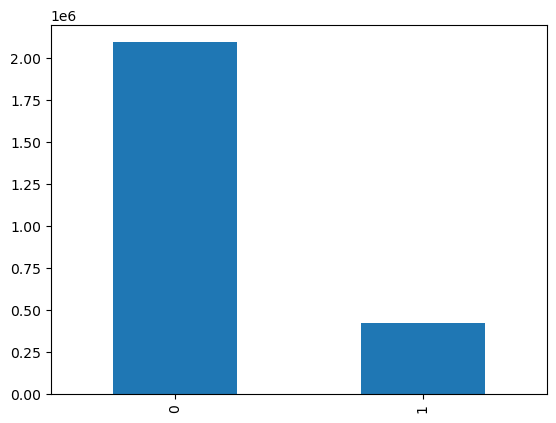

In [50]:
df[' Label'].value_counts().plot.bar()

Here are the normal and attack values in percentages

In [51]:
df[' Label'].value_counts(normalize=True)

0    0.831109
1    0.168891
Name:  Label, dtype: float64

Groups by unique values in the label column and effectively displays the number of rows for each label after filtering is applied.

In [52]:
df=df.groupby(' Label').filter(lambda x:len(x)>10000)
df[' Label'].value_counts()

0    2095057
1     425741
Name:  Label, dtype: int64

This code creates a heatmap of the correlation matrix for the DataFrame using the Seaborn library.

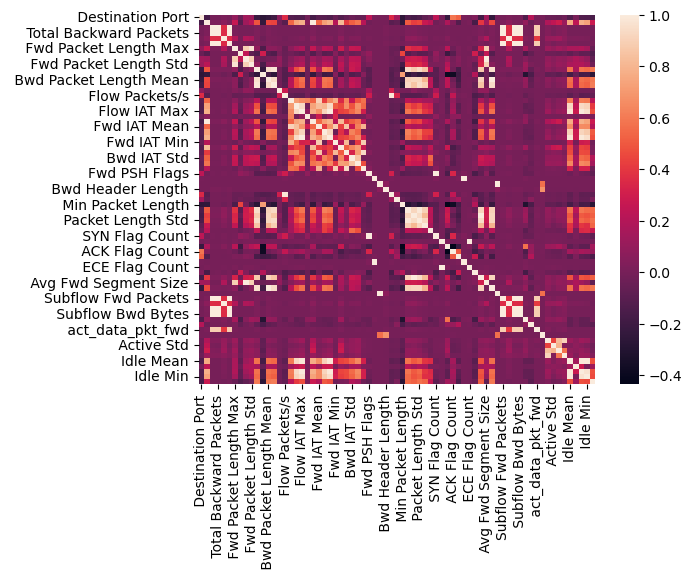

In [53]:
sns.heatmap(df.corr())
plt.show()

This line of code drops the highly correlated columns from the DataFrame

This code block prepares the feature matrix X and the target vector y for machine learning.

In [54]:
df.shape

(2520798, 71)

In [55]:
X = df.drop(columns=[' Label'])
y = df[' Label']

Here the data is splitting into 70% for train and 30% for test

In [56]:
# Split the data into a training set (70%), and a temporary set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into a validation set (20% of the total data) and a test set (20% of the total data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

see training and test value

In [57]:
print("Training set:", len(X_train))
print("Validation set:", len(X_val))
print("Testing set:", len(X_test))


Training set: 1764558
Validation set: 252080
Testing set: 504160


These lines of code measure and fit feature values in the training and test datasets using the module class

In [58]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [59]:
# Make sure to replace input_shape and output_classes with the correct values for your dataset
input_shape = (X_train.shape[1], 1)
output_classes = 1

I looked at many models and changed the model architecture.
Most architectures use 2-layer convolution.
The model has:

In [60]:
def create_1d_cnn_model(params):
    model = Sequential()
    
    model.add(Conv1D(filters=params['num_filters'], kernel_size=params['kernel_size'], activation='relu', input_shape=(input_shape)))
    model.add(MaxPooling1D(pool_size=params['pooling_size']))
    
    model.add(Conv1D(filters=params['num_filters'], kernel_size=params['kernel_size'], activation='relu'))
    model.add(MaxPooling1D(pool_size=params['pooling_size']))
       
    model.add(Dropout(params['dropout_rate']))    
    model.add(Flatten())

    for _ in range(params['num_dense_layers']):
        model.add(Dense(params['num_neurons_in_dense_layers'], activation='relu'))
        model.add(Dropout(params['dropout_rate']))

    model.add(Dense(output_classes, activation='sigmoid'))

    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [61]:
def generate_random_parameters():
    params = {
        'num_filters': random.choice([16, 32, 64, 128, 256]),
        'kernel_size': random.choice([3, 5, 7, 9, 11]),
        'pooling_size': random.randint(2, 6),
        'num_dense_layers': random.randint(1, 5),
        'num_neurons_in_dense_layers': random.choice([16, 32, 64, 128, 256]),
        'dropout_rate': random.uniform(0.1, 0.5),
        'learning_rate': random.uniform(1e-5, 1e-2),
        'batch_size': random.choice([16, 32, 64, 128, 256]),
        'num_epochs': random.randint(10, 100)
    }
    return params

In [62]:
def genetic_algorithm(population_size, generations, mutation_rate, crossover_rate):
    population = [generate_random_parameters() for _ in range(population_size)]

    for generation in range(generations):
        print(f"Generation {generation+1}")

        # Evaluate fitness of the population
        fitness_scores = []
        for i, params in enumerate(population):
            print(f"  Evaluating individual {i+1}/{population_size}")
            fitness_score = evaluate_fitness(params)
            fitness_scores.append(fitness_score)
                     
        # Select parents
        parents = selection(population, fitness_scores, crossover_rate)

        # Crossover
        offspring = crossover(parents)

        # Mutation
        offspring = mutation(offspring, mutation_rate)

        # Replace the worst individuals
        population = update_population(population, fitness_scores, offspring)

    return max(population, key=evaluate_fitness)

In [63]:
def evaluate_fitness(params):
    model = create_1d_cnn_model(params)
    
    # Create a custom callback to print epoch progress
    class PrintEpochProgress(keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            print(f"  Epoch {epoch+1}/{params['num_epochs']} - val_accuracy: {logs['val_accuracy']:.4f}")
    
    history = model.fit(X_train, y_train, batch_size=params['batch_size'], epochs=params['num_epochs'], verbose=0, validation_data=(X_val, y_val), callbacks=[PrintEpochProgress()])
    return history.history['val_accuracy'][-1]

def selection(population, fitness_scores, crossover_rate):
    parents = []
    for _ in range(int(crossover_rate * len(population))):
        selected = random.choices(population, weights=fitness_scores, k=2)
        parents.append(selected)
    return parents

def crossover(parents):
    offspring = []
    for parent1, parent2 in parents:
        child = {}
        for key in parent1.keys():
            child[key] = random.choice([parent1[key], parent2[key]])
        offspring.append(child)
    return offspring

def mutation(offspring, mutation_rate):
    mutated_offspring = []
    for child in offspring:
        mutated_child = {}
        for key in child.keys():
            if random.random() < mutation_rate:
                mutated_child[key] = generate_random_parameters()[key]
            else:
                mutated_child[key] = child[key]
        mutated_offspring.append(mutated_child)
    return mutated_offspring

def update_population(population, fitness_scores, offspring):
    sorted_indices = np.argsort(fitness_scores)
    for i in range(len(offspring)):
        population[sorted_indices[i]] = offspring[i]
    return population

* It initializes a population with random hyperparameters for the model.
* For each generation, it evaluates the performance of each individual in the population by training and testing the model with the given hyperparameters.
* The population is sorted based on their performance, and the best individuals are selected for the next generation.
* The algorithm iterates through the specified number of generations, and at the end, it returns the best set of hyperparameters found.

In this line, the process of searching for best_individual is performed. In the process of model testing

In [ ]:
population_size = 20 
generations = 10
mutation_rate = 0.1
crossover_rate = 0.5

best_parameters = genetic_algorithm(population_size, generations, mutation_rate, crossover_rate)

Generation 1
  Evaluating individual 1/20
  Epoch 1/47 - val_accuracy: 0.9767
  Epoch 2/47 - val_accuracy: 0.9748
  Epoch 3/47 - val_accuracy: 0.9756
  Epoch 4/47 - val_accuracy: 0.9758
  Epoch 5/47 - val_accuracy: 0.9754
  Epoch 6/47 - val_accuracy: 0.9693


In [ ]:
print("Best parameters found:")
for key, value in best_parameters.items():
    print(f"{key}: {value}")

In [ ]:
best_model = create_1d_cnn_model(best_parameters)
history = best_model.fit(X_train, y_train, batch_size=best_parameters['batch_size'], epochs=best_parameters['num_epochs'], validation_data=(X_val, y_val))

In [ ]:
# Plot the training and validation accuracy over the epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig('acc_plo.jpg')

In [ ]:
# Plot the training and validation loss over the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig('los_plo.jpg')

In [ ]:
# Print train, test and validation accuracy
train_loss, train_acc = best_model.evaluate(np.expand_dims(X_train, axis=2), y_train, verbose=0)
print('Train Loss: {:.2f}%'.format(train_loss*100))
print('Train Accuracy: {:.2f}%'.format(train_acc*100))

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(np.expand_dims(X_test, axis=2), y_test, verbose=0)
print("Test Loss: {:.2f}%".format(test_loss*100))
print("Test Accuracy: {:.2f}%".format(test_accuracy*100))

In [ ]:
y_pred = best_model.predict(np.expand_dims(X_test, axis=2))

In [ ]:
plot_model(best_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Performance comparison table
print(classification_report(y_test, np.round(y_pred)))

In [ ]:
# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, np.round(y_pred))

# Define the class labels
class_labels = ['No Intrusion', 'Intrusion']

# Create a heatmap plot of the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Set the plot labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
plt.savefig('con_max.jpg')

In [ ]:
# Predict the test set
y_pred = best_model.predict(np.expand_dims(X_test, axis=2))
y_pred = (y_pred > 0.5)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print confusion matrix as heatmap with percentages
plt.figure(figsize=(8,6))
sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Percentages')
plt.show()
plt.savefig('con_muxf.jpg')

In [ ]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.show()
plt.savefig('roc_cur.jpg')

In [ ]:
# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.show()
plt.savefig('pre_rec.jpg')

In [ ]:
# Get the test accuracy and loss for each epoch from the history object
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

# Plot the test accuracy and loss
plt.plot(test_acc, label='Test Accuracy')
plt.plot(test_loss, label='Test Loss')

# Add axis labels and a legend
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.title('Test Accuracy and Loss')
plt.legend()

# Show the plot
plt.show()
plt.savefig('tes_los.jpg')